# DX 601 Final Project

## Introduction

In this project, you will practice all the skills that you have learned throughout this module.
You will pick a data set to analyze from a list provided, and then perform a variety of analysis.
Most of the problems and questions are open ended compared to your previous homeworks, and you will be asked to explain your choices.
Most of them will have a particular type of solution implied, but it is up to you to figure out the details based on what you have learned in this module.

## Instructions

Each problem asks you to perform some analysis of the data, and usually answer some questions about the results.
Make sure that your question answers are well supported by your analysis and explanations; simply stating an answer without support will earn minimal points.

Notebook cells for code and text have been added for your convenience, but feel free to add additional cells.

## Example Code

You may find it helpful to refer to this GitHub repository of Jupyter notebooks for example code.

* https://github.com/bu-cds-omds/dx500-examples
* https://github.com/bu-cds-omds/dx601-examples
* https://github.com/bu-cds-omds/dx602-examples

Any calculations demonstrated in code examples or videos may be found in these notebooks, and you are allowed to copy this example code in your homework answers.

## Submission

This project will be entirely manually graded.
However, we may rerun some or all of your code to confirm that it works as described.

### Late Policy

The normal homework late policy for OMDS does not apply to this project.
Boston University requires final grades to be submitted within 72 hours of class instruction ending, so we cannot accommodate 5 days of late submissions.

However, we have delayed the due date of this project to be substantially later than necessary given its scope, and given you more days for submission with full credit than you would have had days for submission with partial credit under the homework late policy.
Finally, the deadlines for DX 601 and DX 602 were coordinated to be a week apart while giving ample time for both of their projects.

## Shared Imports

For this project, you are forbidden to use modules that were not loaded in this template.
While other modules are handy in practice, modules that trivialize these problems interfere with our assessment of your own knowledge and skills.

If you believe a module covered in the course material (not live sessions) is missing, please check with your learning facilitator.

In [1]:
import math
import sys

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats
import sklearn.linear_model

from sklearn.decomposition import PCA

## Problems

### Problem 1 (5 points)

Pick one of the following data sets to analyze in this project.
Load the data set, and show a random sample of 10 rows.

* [Iris data set](https://archive.ics.uci.edu/dataset/53/iris) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/iris))
* [Breast Cancer Wisconsin](https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic) ([PMLB copy](https://github.com/EpistasisLab/pmlb/tree/master/datasets/_deprecated_breast_cancer_wisconsin))
* [Wine Quality](https://archive.ics.uci.edu/dataset/186/wine+quality) ([PMLB - white subset only](https://github.com/EpistasisLab/pmlb/tree/master/datasets/wine_quality_white))


The PMLB copies of the data are generally cleaner and recommended for this project, but the other links are provided to give you more context.
To load the data from the PMLB Github repository, navigate to the `.tsv.gz` file in GitHub and copy the link from the "Raw" button.

If the data set you choose has more than ten columns, you may limit later analysis that is requested per column to just the first ten columns.

In [3]:
# YOUR CODE HERE
# Load the Dataset 
wine_quality = pd.read_csv("https://github.com/EpistasisLab/pmlb/raw/refs/heads/master/datasets/wine_quality_white/wine_quality_white.tsv.gz", sep="\t")

In [4]:
# View the dataset
wine_quality.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
1400,7.3,0.25,0.36,13.10,0.050,35.0,200.0,0.99860,3.04,0.46,8.9,7
1582,8.4,0.24,0.49,7.40,0.039,46.0,108.0,0.99340,3.03,0.33,11.9,7
3986,6.8,0.11,0.27,8.60,0.044,45.0,104.0,0.99454,3.20,0.37,9.9,6
2901,6.5,0.22,0.32,2.20,0.028,36.0,92.0,0.99076,3.27,0.59,11.9,7
1067,7.5,0.19,0.34,2.60,0.037,33.0,125.0,0.99230,3.10,0.49,11.1,7
2258,7.6,0.48,0.28,10.40,0.049,57.0,205.0,0.99748,3.24,0.45,9.3,5
255,6.7,0.26,0.39,1.10,0.040,45.0,147.0,0.99350,3.32,0.58,9.6,8
2895,6.4,0.44,0.26,2.00,0.054,20.0,180.0,0.99520,3.58,0.57,10.0,5
2525,7.3,0.17,0.24,8.10,0.121,32.0,162.0,0.99508,3.17,0.38,10.4,8
3010,6.7,0.25,0.31,1.35,0.061,30.5,218.0,0.99388,3.16,0.53,9.5,5


In [5]:
# Limit the dataset to 10 columns
wine_quality = wine_quality.drop(("alcohol"), axis=1)

In [6]:
# View the dataset again with just 10 columns
wine_quality.sample(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target
1643,8.1,0.300,0.49,12.3,0.049,50.0,144.0,0.99710,3.09,0.57,7
3626,7.0,0.290,0.33,0.9,0.041,20.0,117.0,0.99048,3.21,0.50,5
763,5.0,0.440,0.04,18.6,0.039,38.0,128.0,0.99850,3.37,0.57,6
1143,7.2,0.240,0.30,1.6,0.048,27.0,131.0,0.99330,3.25,0.45,5
3271,6.5,0.320,0.34,5.7,0.044,27.0,91.0,0.99184,3.28,0.60,7
2444,7.6,0.285,0.32,14.6,0.063,32.0,201.0,0.99800,3.00,0.45,5
3184,6.2,0.100,0.41,1.0,0.040,17.0,76.0,0.98988,3.14,0.56,7
949,7.3,0.250,0.39,6.4,0.034,8.0,84.0,0.99420,3.18,0.46,5
952,6.5,0.170,0.33,1.4,0.028,14.0,99.0,0.99280,3.23,0.55,6
1952,8.1,0.310,0.36,8.2,0.028,29.0,142.0,0.99250,3.01,0.34,7


In [7]:
wine_quality.describe()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,9.000000


YOUR ANSWERS HERE

### Problem 2 (10 points)

List all the columns in the data set, and describe each of them in your own words.
You may have to search to learn about the data set columns, but make sure that the descriptions are your own words.

In [8]:
# YOUR CODE HERE

In [9]:
# List all of the columns in the dataset
wine_quality.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'target'],
      dtype='object')

YOUR ANSWERS HERE

### Column Descriptions
* fixed acidity: A value representing the concentration of non-volatile acids in the wine. An example of a fixed acis is tartaric acid.
* volatile acidity: A value representing the concentration of volatile acids in the wine. An example of a volatile acid is acetic acid.
* citric acid: Amount of citric acid in the wine. Citric acid is a weak organic chemical present in wine in small quantities. Citric acid is known to add freshness and enhance the wine’s flavor and aroma.
* residual sugar: The amount of sugar remaining after fermentation. A higher residual sugar content will result in a sweeter wine.
* chlorides: The concentration of salt in the wine. A higher chloride concentration may indicate a higher salinity and can negatively affect wine flavor.
* free sulfur dioxide: Free sulfur dioxide refers to the portion of sulfur dioxide (SO₂) that is not bound to other molecules and acts as an antimicrobial and antioxidant agent. Optimal levels of free sulfur dioxide help preserve wine, but excessive SO₂ can affect taste and aroma.
* total sulfur dioxide: The total amount of free and bound SO₂. Optimal levels help to preserve wine, but excessive SO₂ can affect taste and aroma.
* density: This value represents the density of the wine. The density will be related to the sugar and alcohol content. Higher sugar content will increase density, while higher alcohol content will decrase it.
* pH: The pH level ndicates the acidity level of the wine. Lower pH means higher acidity. The pH level affects microbial stability, color, and taste.
* sulphates: Sulphates (often potassium sulphate) contribute to sulfur dioxide levels. Similar to the sulfur dioxide columns, this is an indicator of the presence of preservatives. Optimal levels help to preserve wine, but excessive levels can affect taste and aroma.
* target: the target represents the wine quality evaluated by wine experts, scored based on sensory data. The scores range from 0 (very bad) to 10 (very excellent). 

In [10]:
wine_quality.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  target                4898 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 421.1 KB


### Problem 3 (15 points)

Plot histograms of each column.
For each column, state the distribution covered in this module that you think best matches that column.

In [11]:
# YOUR CODE HERE

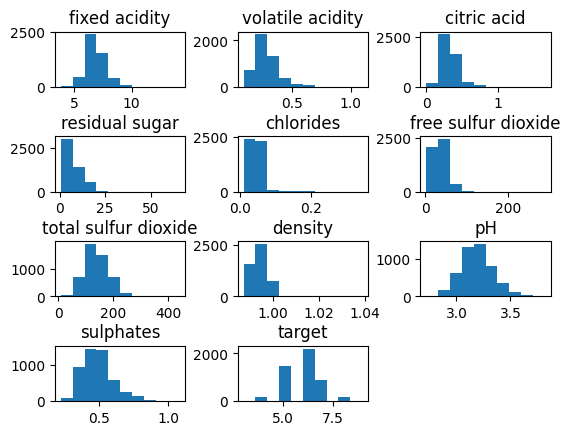

In [12]:
# To see the Distributions of all the columns via Histograms

wine_quality.hist(grid=False)
plt.subplots_adjust(wspace=0.4, hspace=0.9)

### Description of Each Column's Distribution:
* fixed acidity: normal distribution
* volatile acidity: normal distribution
* citric acid: right-skewed distribution
* residual sugar: right-skewed distribution 
* chlorides: uniform distribution
* free sulfur dioxide: right-skewed distribution
* total sulfur dioxide: normal distribution
* density: right-skewed distribution
* pH: normal distribution
* sulphates: normal distribution
* target: multimodal distribution

YOUR ANSWERS HERE

### Problem 4 (20 points)

Plot each pair of an input column and the output column.
Classify each pair of input column and the output column as being independent or not.
Describe in words why you think that was the case.

In [13]:
# YOUR CODE HERE

In [14]:
# Plot the correlation matrix
corr = wine_quality.corr(numeric_only=True)
corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target
fixed acidity,1.000000,-0.022697,0.289181,0.089021,0.023086,-0.049396,0.091070,0.265331,-0.425858,-0.017143,-0.113663
volatile acidity,-0.022697,1.000000,-0.149472,0.064286,0.070512,-0.097012,0.089261,0.027114,-0.031915,-0.035728,-0.194723
citric acid,0.289181,-0.149472,1.000000,0.094212,0.114364,0.094077,0.121131,0.149503,-0.163748,0.062331,-0.009209
residual sugar,0.089021,0.064286,0.094212,1.000000,0.088685,0.299098,0.401439,0.838966,-0.194133,-0.026664,-0.097577
chlorides,0.023086,0.070512,0.114364,0.088685,1.000000,0.101392,0.198910,0.257211,-0.090439,0.016763,-0.209934
free sulfur dioxide,-0.049396,-0.097012,0.094077,0.299098,0.101392,1.000000,0.615501,0.294210,-0.000618,0.059217,0.008158
total sulfur dioxide,0.091070,0.089261,0.121131,0.401439,0.198910,0.615501,1.000000,0.529881,0.002321,0.134562,-0.174737
density,0.265331,0.027114,0.149503,0.838966,0.257211,0.294210,0.529881,1.000000,-0.093591,0.074493,-0.307123
pH,-0.425858,-0.031915,-0.163748,-0.194133,-0.090439,-0.000618,0.002321,-0.093591,1.000000,0.155951,0.099427
sulphates,-0.017143,-0.035728,0.062331,-0.026664,0.016763,0.059217,0.134562,0.074493,0.155951,1.000000,0.053678


In [15]:
target_corr = corr['target'].abs().sort_values(ascending=False)
target_corr

target                  1.000000
density                 0.307123
chlorides               0.209934
volatile acidity        0.194723
total sulfur dioxide    0.174737
fixed acidity           0.113663
pH                      0.099427
residual sugar          0.097577
sulphates               0.053678
citric acid             0.009209
free sulfur dioxide     0.008158
Name: target, dtype: float64

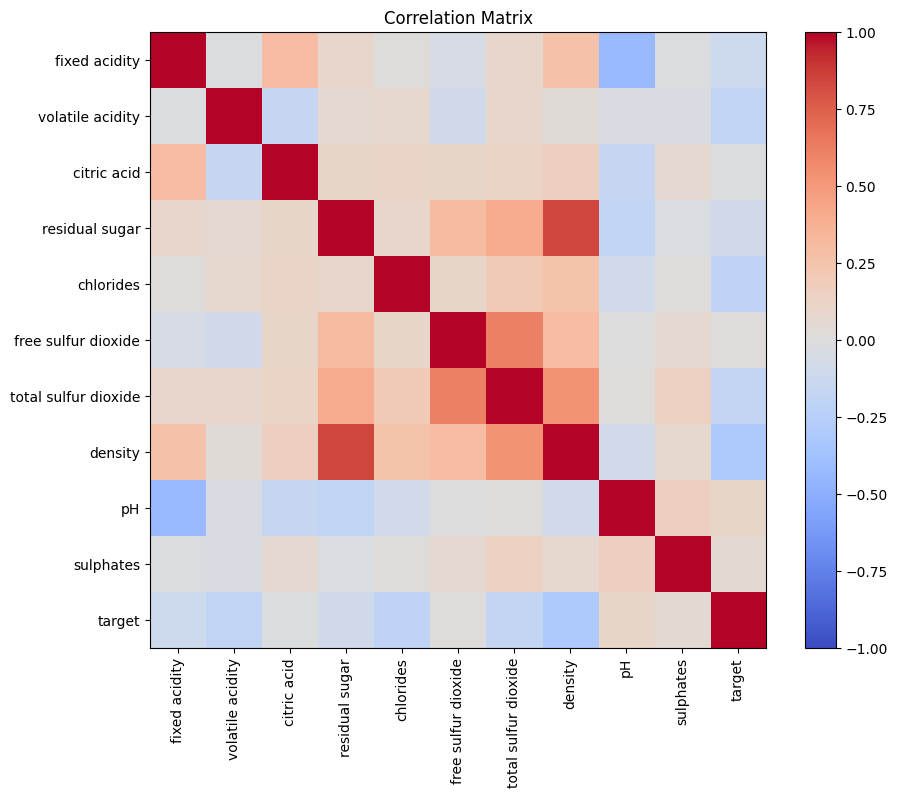

In [16]:
# Look at a heat map of Correlations

corr = wine_quality.corr(numeric_only=True)

plt.figure(figsize=(10,8))
plt.imshow(corr, cmap='coolwarm', vmin=-1, vmax=1)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Matrix")
plt.show()

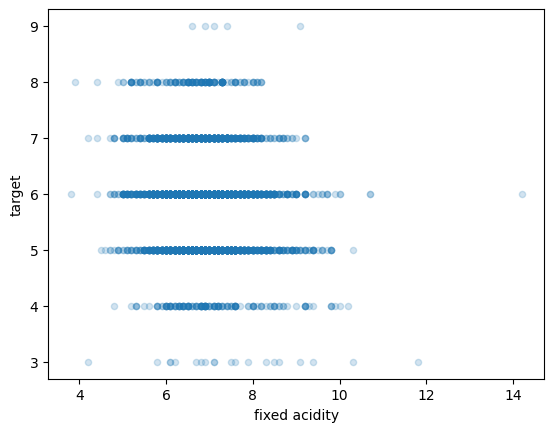

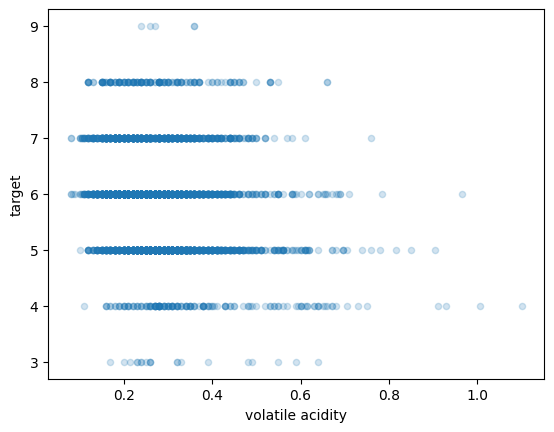

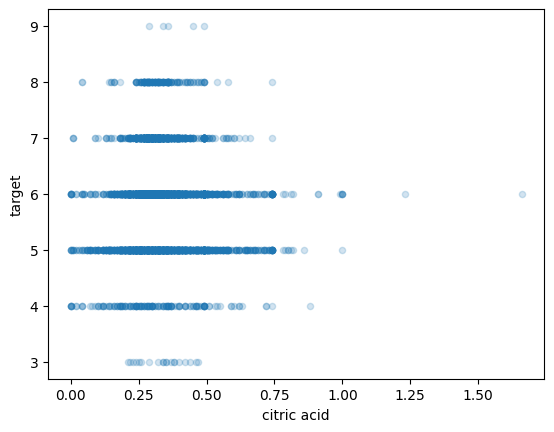

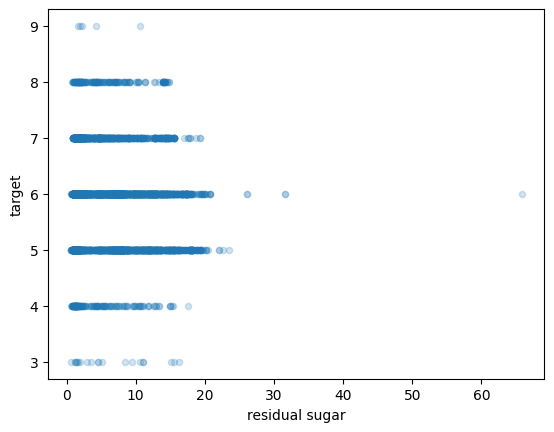

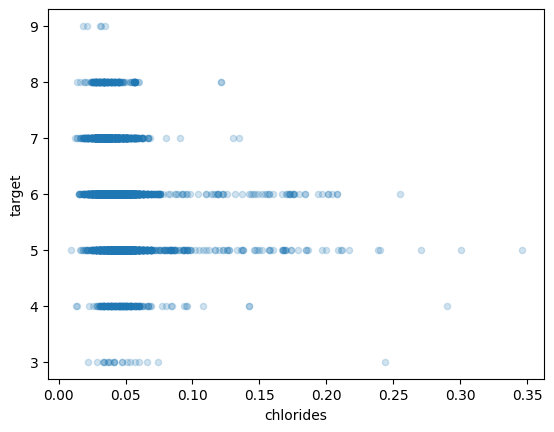

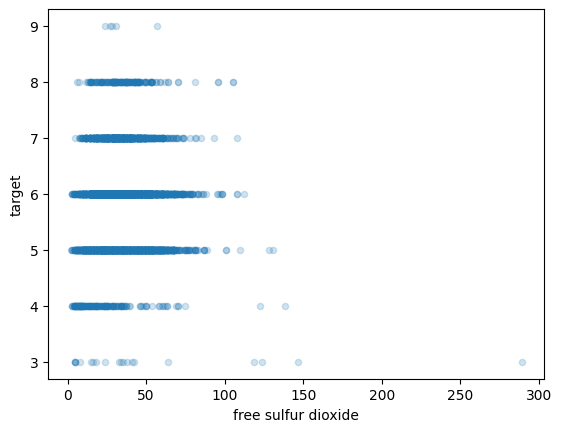

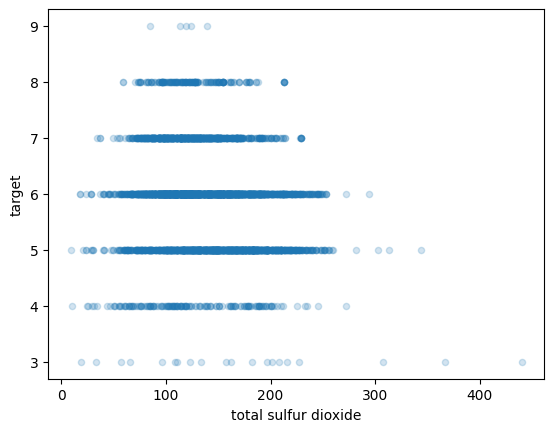

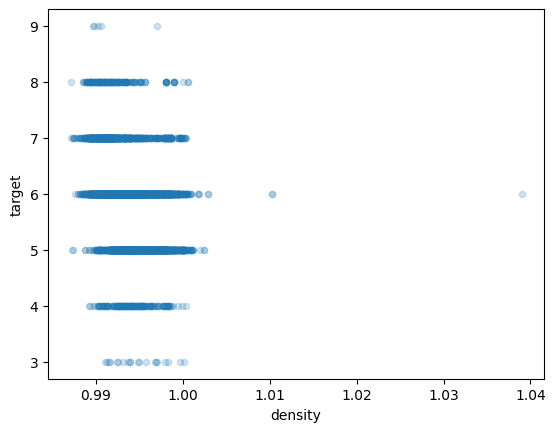

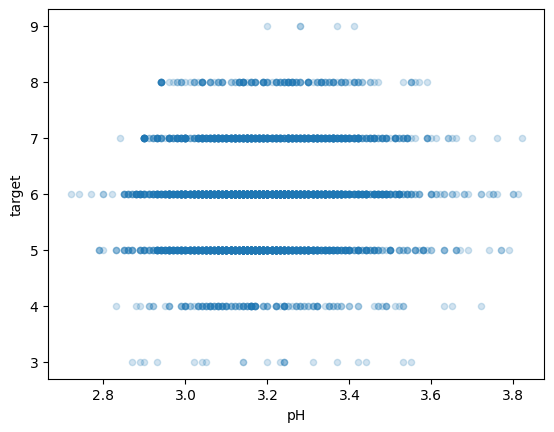

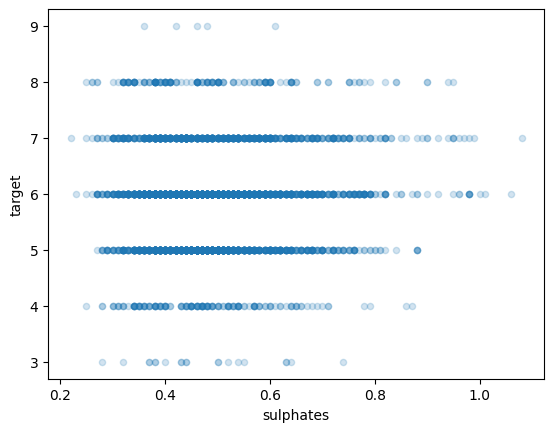

In [17]:
# Look at every columns vs. the target column as a Scatter Plot to see correlation

for c in wine_quality.columns:
    if c == "target":
        continue
    wine_quality.plot.scatter(x=c, y="target", alpha=0.2)
    #wine_quality.plot.scatter(x=c, y="target")
    plt.xlabel(c)
    plt.ylabel("target")
    plt.show()

### Indepenednce / Dependence of Input Columns v. the output
To look at the dependence status of each input column vs the output, I looked at the correlation matrix, a heatmap of the correlation matrix, and scatter plots of each input v. the output. It should be noted that since the target was ordinal (meaning it only consists of a fixed set of values, here 1-10), the scatter plots were slightly difficult to use to solely determine dependence status. Therefore, I looked at this in addition to the correlation matrx. To classify an input column as dependent or not from the output I used a threshold as 0.20. Thus, any columns that have a correlation under 0.20 have been marked as independent, as these low values are likely dominated by noise. It should also be noted, that none of these columns alone had a high correlation with the target. The target, or output, here represents a score of wine quality. Each column and its dependence status:
* fixed acidity: independent of the output, has a correlation of only 0.11
* volatile acidity: slightly independent of the output, just under the threshold with a correlation of 0.19
* citric acid: highly independent of the output, has a correlation of only 0.009
* residual sugar: independent of the output, has a correlation of only 0.1
* chlorides: slightly depdendent on the output, has a correlation right above the threshold of 0.21
* free sulfur dioxide: highly independent of the output, has a correlation of only 0.008
* total sulfur dioxide: slightly independent of the output, has a correlation just under the threshold of 0.17. The difference between the correlation of free sulfur dioxide and total dulfur dioxide should be notes, this can be used to infer the bound sulfur dioxide has a higher correlation with the output than the free sulfur dioxide.
* density: dependent with the output, has a correlation of 0.3. Density has the highest correlation with the output.
* pH: independent of the output, has a correlation of only 0.1
* sulphates: independent of the output, has a correlation of only 0.05

YOUR ANSWERS HERE

### Problem 5 (20 points)

Build an ordinary least squares regression for the target using all the input columns.
Report the mean squared error of the model over the whole data set.
Plot the actual values vs the predicted outputs to compare them. 

In [18]:
# YOUR CODE HERE

In [19]:
# Define the ordinary least squares regression model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [20]:
# Define the inputs and target
input_cols = wine_quality.drop(["target"], axis=1)
target_col = wine_quality["target"]

In [21]:
# Build out the model on puts and target
model_output = model.fit(input_cols, target_col)
model_output

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [22]:
# Predict Values for the Target col based on the model
model_predictions = model.predict(input_cols)
model_predictions

array([5.53929786, 5.20646545, 5.87865419, ..., 5.36226019, 6.52274975,
       6.37119348], shape=(4898,))

In [23]:
# Add the Predicts to a Copy of the df
wine_quality_copy = wine_quality.copy()
wine_quality_copy["predictions"] = model_predictions
wine_quality_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target,predictions
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,6,5.539298
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,6,5.206465
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,6,5.878654
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.790128
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.790128
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,6.167555
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,5.716698
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,5.362260
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,6.522750


In [24]:
# Calculate the residuals
wine_quality_copy["residuals"] = abs(model_predictions- wine_quality_copy["target"])
wine_quality_copy

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target,predictions,residuals
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,6,5.539298,0.460702
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,6,5.206465,0.793535
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,6,5.878654,0.121346
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.790128,0.209872
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.790128,0.209872
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,6.167555,0.167555
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,5.716698,0.716698
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,5.362260,0.637740
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,6.522750,0.477250


In [25]:
# Calculate the mean squared error
resuiduals_squared = wine_quality_copy["residuals"] ** 2
mean_resuiduals_squared = np.mean(resuiduals_squared)
mean_resuiduals_squared

np.float64(0.5705081640558527)

The mean squared error of the model over the whole data set is 0.57.

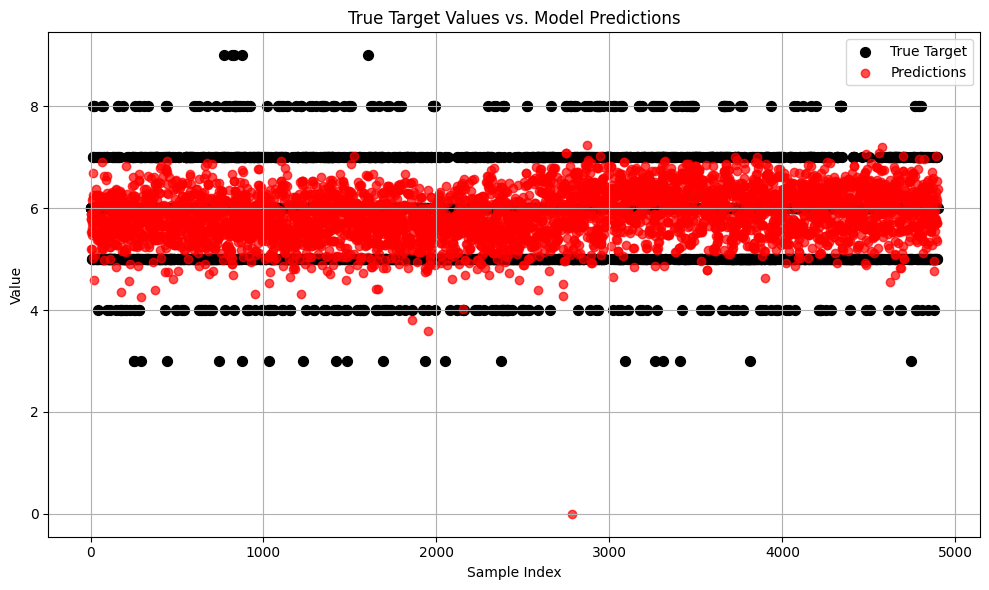

In [26]:
# Plot target and model values

# x-axis is just sample index
x = np.arange(len(wine_quality_copy))

plt.figure(figsize=(10, 6))

# True target values as black scatter
plt.scatter(x, wine_quality_copy["target"], label="True Target", color="black", s=50)

# Predictions as scatter points in different colors
plt.scatter(x, wine_quality_copy["predictions"], label="Predictions", alpha=0.7, color="red")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("True Target Values vs. Model Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

It should be noted here, that this scatter plot shows that most of the model predictions fall within the 4-6 range where there are many actual values at the 3 level and 8 and 9 levels. Therefore, the model is underrepresenting the 'extreme' values in the target column. Better stated, the model is underrepresneting the very high and very low scores for wine quality. I have researched why this may be the case. Ordinary least squares regression assumes a continuous target. Therefore, when using OLS on an ordinal target variable it is common behavior for it to underrepsent the high and low values and overrepresent values closer to the mean.

In [27]:
wine_quality_copy.query("target > 8")

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target,predictions,residuals
774,9.1,0.27,0.45,10.6,0.035,28.0,124.0,0.99700,3.20,0.46,9,5.940330,3.059670
820,6.6,0.36,0.29,1.6,0.021,24.0,85.0,0.98965,3.41,0.61,9,6.664759,2.335241
827,7.4,0.24,0.36,2.0,0.031,27.0,139.0,0.99055,3.28,0.48,9,6.541504,2.458496
876,6.9,0.36,0.34,4.2,0.018,57.0,119.0,0.98980,3.28,0.36,9,6.748552,2.251448
1605,7.1,0.26,0.49,2.2,0.032,31.0,113.0,0.99030,3.37,0.42,9,6.637907,2.362093


In [28]:
model_output.score(input_cols, target_col)

0.2724924722408163

YOUR ANSWERS HERE

### Problem 6 (20 points)

Which input column gives the best linear model of the target on its own?
How does that model compare to the model in problem 5?


In [29]:
from sklearn.linear_model import LinearRegression
p6_model = LinearRegression()


In [30]:
for col in wine_quality.columns:
    count = 0
    X_col = wine_quality[[col]]
    model_fit = p6_model.fit(X_col, target_col)
    score = model_fit.score(X_col, target_col)
    print(f"{col}: {score}")
    count += 1


fixed acidity: 0.012919239085695922
volatile acidity: 0.03791703462546103
citric acid: 8.480735490923319e-05
residual sugar: 0.009521237537144067
chlorides: 0.044072456899563295
free sulfur dioxide: 6.655405919031576e-05
total sulfur dioxide: 0.030533095213563177
density: 0.09432472922515456
pH: 0.00988577719477901
sulphates: 0.002881314493482945
target: 1.0


In [31]:
# YOUR CODE HERE

The density column creates the best linear model on its own. Density also has the highest correlation to the target column. The model on all inputs is better, can see this as it has a higher score.

YOUR ANSWERS HERE

### Problem 7 (20 points)

Pick and plot a pair of input columns with a visible dependency.
Identify a split of the values of one column illustrating the dependency and plot histograms of the other variable on both sides of the split.
That is, pick a threshold $t$ for one column $x$ and make two histograms, one where $x < t$ and one where $x \geq t$.

These histograms should look significantly different to make the dependency clear.
There should be enough data in both histograms so that these differences are unlikely to be noise.
Also make sure that the horizontal axis is the same in both histograms for clarity.

In [32]:
# YOUR CODE HERE

In [33]:
# Look at just the highest correlated columns (top 10)
corr_pairs = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))  # remove diagonal
        .abs()
        .unstack()
        .sort_values(ascending=False)
)

corr_pairs.head(10)

residual sugar        density                 0.838966
density               residual sugar          0.838966
free sulfur dioxide   total sulfur dioxide    0.615501
total sulfur dioxide  free sulfur dioxide     0.615501
density               total sulfur dioxide    0.529881
total sulfur dioxide  density                 0.529881
pH                    fixed acidity           0.425858
fixed acidity         pH                      0.425858
residual sugar        total sulfur dioxide    0.401439
total sulfur dioxide  residual sugar          0.401439
dtype: float64

The two columns I have chosen to look at with a dependency on one another are the residual sugar and density columns.

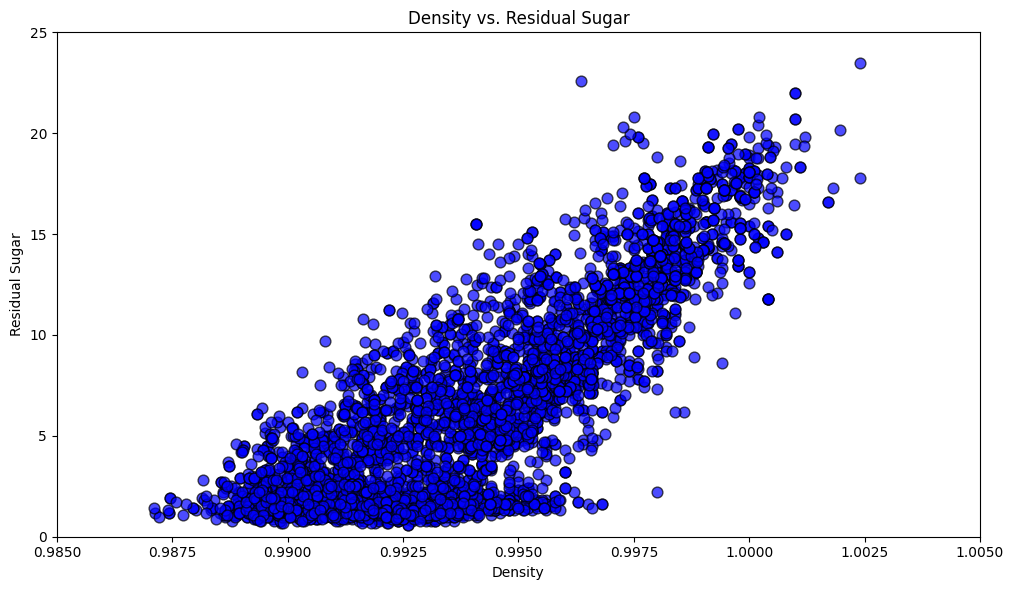

In [34]:
# Plot two columns with a visible dependency

plt.figure(figsize=(10, 6))
plt.scatter(wine_quality["density"], wine_quality["residual sugar"], alpha=0.7, s=60, color="blue", edgecolor="black", )
plt.xlabel("Density")
plt.ylabel("Residual Sugar")
plt.title("Density vs. Residual Sugar")
plt.tight_layout()
plt.xlim(0.985, 1.005)
plt.ylim(0,25)
plt.show()

A clear correlation between the columns exists

In [35]:
# Determine the median of the columns to help pick a threshold
wine_quality["density"].agg("median")

np.float64(0.99374)

The chosen threshold for the density column in 0.99

In [36]:
# Split the data on the threshold
x = "density"
y = "residual sugar"
t = wine_quality[x].median()

below_threshold = wine_quality[wine_quality[x] < t][y]
above_threshold = wine_quality[wine_quality[x] >= t][y]


In [37]:
# Ensuring there is enough data on both Sides of the threshold
print(len(below_threshold))
print(len(above_threshold))


2448
2450


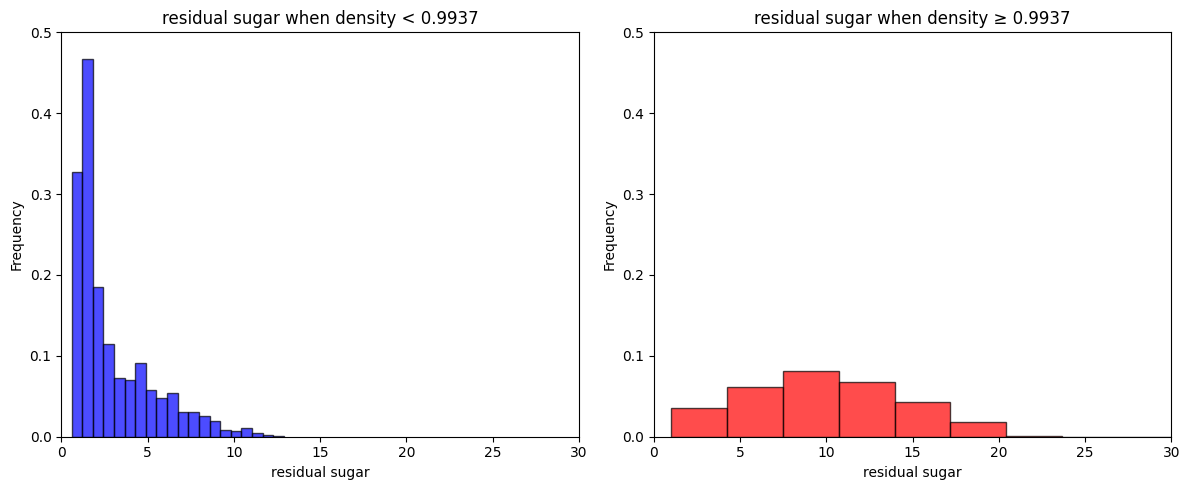

In [38]:
# Plot Residuar Sugar with Density below the threshold
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(below_threshold, bins=20, color='blue', edgecolor='black', alpha=0.7, density=True)
plt.title(f"{y} when {x} < {t:.4f}")
plt.xlabel(y)
plt.ylabel("Frequency")
plt.xlim(0,30)
plt.ylim(0,0.5)

plt.subplot(1, 2, 2)
plt.hist(above_threshold, bins=20, color='red', edgecolor='black', alpha=0.7, density=True)
plt.title(f"{y} when {x} ≥ {t:.4f}")
plt.xlabel(y)
plt.ylabel("Frequency")
plt.xlim(0,30)
plt.ylim(0,0.5)

plt.tight_layout()
plt.show()


These histograms have very different distributions as expected

YOUR ANSWERS HERE

### Problem 8 (40 points)

Perform principal components analysis of the input columns.
Compute how much of the data variation is explained by the first half of the principal components.
Build a linear regression using coordinates computed from the first half of the principal components.
Compare the mean squared error of this model to the previous model.
Plot actual targets vs predictions again. 

This problem depends on material from week 13.

In [39]:
# YOUR CODE HERE

In [ ]:
# Grab only Numeric Columns for PCA

wine_quality_pca_cols = [c for c in wine_quality.columns if wine_quality[c].dtype == 'float64']
wine_quality_pca_cols

['fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates']

In [ ]:
# Fit the Model for PCA

wine_quality_pca = PCA()
model_output = wine_quality_pca.fit(wine_quality[wine_quality_pca_cols])
model_output

,n_components,None
,copy,True
,whiten,False
,svd_solver,'auto'
,tol,0.0
,iterated_power,'auto'
,n_oversamples,10
,power_iteration_normalizer,'auto'
,random_state,None


In [52]:
# Determine the Principle Components

wine_quality_components = pd.DataFrame(wine_quality_pca.components_, columns=wine_quality_pca_cols)
wine_quality_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.001544,0.000169,0.000339,0.047320,0.000098,0.261905,0.963931,0.000036,0.000004,0.000341
1,-0.009161,-0.001546,0.000140,0.015013,-0.000072,0.964680,-0.262831,-0.000018,-0.000043,-0.000361
2,0.012726,0.000994,0.001258,0.998659,0.000051,-0.026800,-0.041764,0.000444,-0.006999,-0.002139
3,0.995927,-0.007471,0.041874,-0.013195,0.000061,0.008732,-0.003332,0.000591,-0.077723,-0.004076
4,0.074070,-0.097498,-0.018513,0.006418,-0.016212,0.000442,-0.000655,0.003303,0.929294,0.347507
5,-0.048615,-0.335944,0.858445,-0.000424,0.014724,-0.000991,-0.000001,0.000442,-0.146793,0.355082
6,-0.005061,0.171938,-0.345483,-0.000007,0.000489,0.000496,-0.000341,-0.000088,-0.312952,0.867821
7,-0.000869,0.920774,0.375801,-0.000641,0.018461,0.001265,-0.000608,-0.000772,0.102893,0.004267
8,0.001854,-0.013690,-0.019716,0.000058,0.999323,0.000043,-0.000110,0.023165,0.015421,-0.000125
9,-0.000861,0.001518,0.000373,-0.000460,-0.023094,0.000014,-0.000015,0.999726,-0.003262,-0.001219


In [ ]:
# Look at the Explained Variance

wine_quality_pca.explained_variance_

array([1.93121153e+03, 1.68445925e+02, 2.14207133e+01, 6.95422343e-01,
       1.85585549e-02, 1.43068273e-02, 1.14504023e-02, 8.86039183e-03,
       4.47643752e-04, 1.48175509e-06])

In [69]:
# Compute the Variation Described by the First Half of Principal Components

variation_by_first_half = sum(wine_quality_pca.explained_variance_ratio_[0:5])
variation_by_first_half

np.float64(0.9999834733258345)

In [60]:
# Look only at the First Half of Principal Components
top_half_components = wine_quality_components[0:5]
top_half_components

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates
0,0.001544,0.000169,0.000339,0.047320,0.000098,0.261905,0.963931,0.000036,0.000004,0.000341
1,-0.009161,-0.001546,0.000140,0.015013,-0.000072,0.964680,-0.262831,-0.000018,-0.000043,-0.000361
2,0.012726,0.000994,0.001258,0.998659,0.000051,-0.026800,-0.041764,0.000444,-0.006999,-0.002139
3,0.995927,-0.007471,0.041874,-0.013195,0.000061,0.008732,-0.003332,0.000591,-0.077723,-0.004076
4,0.074070,-0.097498,-0.018513,0.006418,-0.016212,0.000442,-0.000655,0.003303,0.929294,0.347507


In [86]:
top_half_components = wine_quality_components.iloc[0:5]
wine_quality_projected = wine_quality[wine_quality_pca_cols] @ top_half_components.T
wine_quality_projected

,0,1,2,3,4
0,176.644787,-1.024618,12.434705,6.303563,3.473727
1,130.991447,-21.222565,-4.232957,5.689800,3.600543
2,101.697906,3.474534,2.116218,7.674834,3.744148
3,192.014466,-3.485477,-0.469521,6.611940,3.564254
4,192.014466,-3.485477,-0.469521,6.611940,3.564254
...,...,...,...,...,...
4893,95.053057,-1.061489,-2.831643,5.811662,3.609197
4894,177.258213,10.890115,-0.492445,6.172137,3.507147
4895,114.920677,-0.275977,-4.179648,6.122323,3.343854
4896,111.331435,-9.652337,-3.984572,5.021079,3.556217


In [87]:

from sklearn.linear_model import LinearRegression

model_pca = LinearRegression()
model_pca.fit(wine_quality_projected, target_col)

pca_predictions = model_pca.predict(wine_quality_projected)
pca_predictions


array([5.62349574, 5.80985329, 6.05125536, ..., 5.89980406, 6.02650218,
       6.04312111], shape=(4898,))

In [89]:
wine_quality_copy_p8 = wine_quality.copy()
wine_quality_copy_p8["predictions"] = pca_predictions
wine_quality_copy_p8["residuals"] = abs(pca_predictions - wine_quality_copy_p8["target"])
wine_quality_copy_p8

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target,predictions,residuals
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,6,5.623496,0.376504
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,6,5.809853,0.190147
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,6,6.051255,0.051255
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.676979,0.323021
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,6,5.676979,0.323021
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,6,6.132346,0.132346
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,5,5.883885,0.883885
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,6,5.899804,0.100196
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,7,6.026502,0.973498


In [81]:
wine_quality_pca.explained_variance_ratio_


array([9.10164369e-01, 7.93872020e-02, 1.00954089e-02, 3.27746924e-04,
       8.74649678e-06, 6.74269198e-06, 5.39648197e-06, 4.17583099e-06,
       2.10970879e-07, 6.98339187e-10])

In [92]:
# Calculate the mean squared error
resuiduals_squared = wine_quality_copy_p8["residuals"] ** 2
mean_resuiduals_squared = np.mean(resuiduals_squared)
mean_resuiduals_squared

np.float64(0.7305427470302945)

The mean squared error for the model built off of PCA is 0.73. This is higher than the mean squared error calculated on the original ordinary least squared regression mode. A smaller mean squared error means the model’s predictions are closer to the true targets. Therefore, based on this statistics the original ordinary least sqaures regression model has predictions closer to the true values.

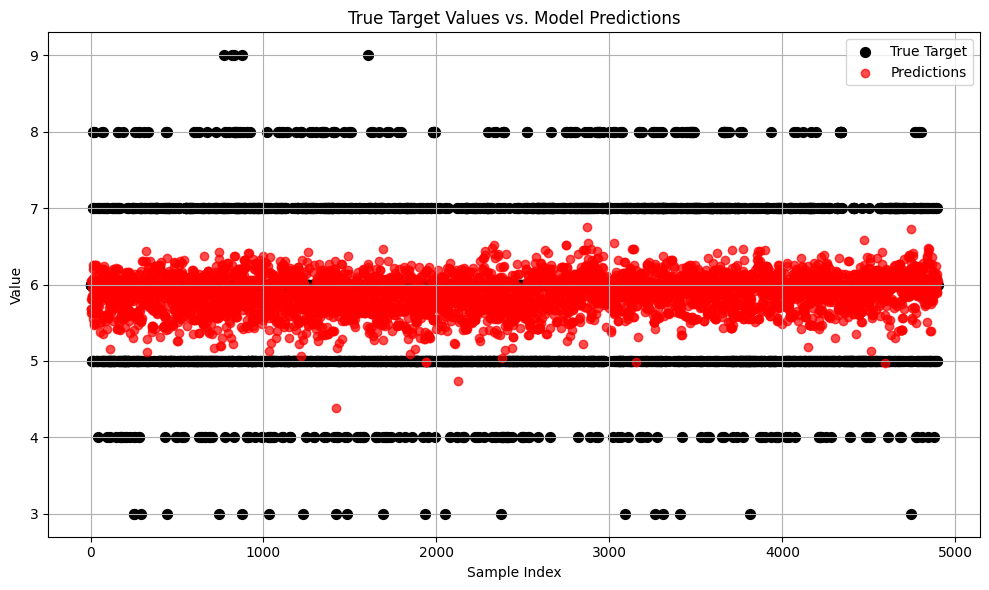

In [90]:
# Plot target and model values

# x-axis is just sample index
x = np.arange(len(wine_quality_copy_p8))

plt.figure(figsize=(10, 6))

# True target values as black scatter
plt.scatter(x, wine_quality_copy_p8["target"], label="True Target", color="black", s=50)

# Predictions as scatter points in different colors
plt.scatter(x, wine_quality_copy_p8["predictions"], label="Predictions", alpha=0.7, color="red")

plt.xlabel("Sample Index")
plt.ylabel("Value")
plt.title("True Target Values vs. Model Predictions")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

YOUR ANSWERS HERE

### Problem 9 (20 points)

What pair of input columns has the highest correlation?
How is that correlation reflected in the principal components?

In [40]:
# YOUR CODE HERE
# Look at just the highest correlated columns (top 10)
corr_pairs = (
    corr.where(~np.eye(corr.shape[0], dtype=bool))  # remove diagonal
        .abs()
        .unstack()
        .sort_values(ascending=False)
)

corr_pairs.head(10)

residual sugar        density                 0.838966
density               residual sugar          0.838966
free sulfur dioxide   total sulfur dioxide    0.615501
total sulfur dioxide  free sulfur dioxide     0.615501
density               total sulfur dioxide    0.529881
total sulfur dioxide  density                 0.529881
pH                    fixed acidity           0.425858
fixed acidity         pH                      0.425858
residual sugar        total sulfur dioxide    0.401439
total sulfur dioxide  residual sugar          0.401439
dtype: float64

The density and residual sugar columns have the highest correlation

In [ ]:
# Look at the variances of each column
# As expected, the order of variances matches the order of the Principle Components

variances = wine_quality.var()
variances_sorted = variances.sort_values(ascending=False)
variances_sorted

total sulfur dioxide    1806.085491
free sulfur dioxide      289.242720
residual sugar            25.725770
target                     0.784356
fixed acidity              0.712114
pH                         0.022801
citric acid                0.014646
sulphates                  0.013025
volatile acidity           0.010160
chlorides                  0.000477
density                    0.000009
dtype: float64

The columns with the higher correlation are residual sugar and density. Residual sugar is captured in the third principal componet while density is captured in the tenth (last) principal component. The correlation between these two columns is related to the principal components. Principal componets finds directions of maximum variation in the dataset. Input columns that have correlation to each other contribute to overlapping variance. Meaning, some of the variance for residual sugar can be contributed to density and vice versa. These columns still exist in the 3rd and 10th principal components because their combined variance is small relative to other columns, such as total and free sulfur dioxide columns. 

YOUR ANSWERS HERE

### Problem 10 (30 points)

Identify an outlier row in the data set.
You may use any criteria discussed in this module, and you must explain the criteria and how it led to picking this row.
Give a visualization showing how much this row sticks out compared to the other data based on your criteria.

YOUR ANSWERS HERE

In [41]:
# YOUR CODE HERE

In [42]:
# Looking at the statistics of each column to look at mean, standard deviations, percentiles, min/max
wine_quality.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,target
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,9.000000


In [43]:
# Looking at the 99th percentile of the Dataset in order to Determine an Outlier row
wine_quality.quantile(0.99)

fixed acidity             9.200000
volatile acidity          0.630000
citric acid               0.740000
residual sugar           18.800000
chlorides                 0.160000
free sulfur dioxide      81.000000
total sulfur dioxide    241.030000
density                   1.000302
pH                        3.600000
sulphates                 0.830000
target                    8.000000
Name: 0.99, dtype: float64

In [44]:
# Retrieving a Row from the Dataframe that is believed to be an outlier 
# Running this Query by retreiving the row that contains the max value for residual sugar

outlier_row = wine_quality.query("`residual sugar` == 65.80")
outlier_value = outlier_row["residual sugar"].iloc[0]

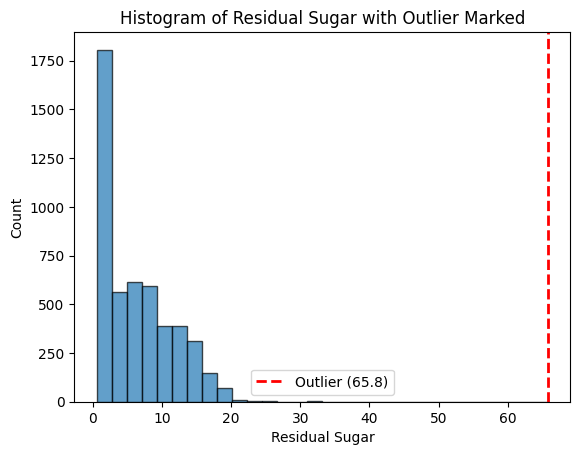

In [45]:
# Plotting a Histogram of the Residual Sugar Distribution and Marking the outlier
plt.hist(wine_quality["residual sugar"], bins=30, alpha=0.7, edgecolor="black")

# Marking the outlier as a vertical red line
plt.axvline(outlier_value, color="red", linestyle="--", linewidth=2, label=f"Outlier ({outlier_value})")

plt.xlabel("Residual Sugar")
plt.ylabel("Count")
plt.title("Histogram of Residual Sugar with Outlier Marked")
plt.legend()
plt.show()

I have identified an outlier row and marked it via the graph above. I identified this row by first looking at the statistics for each numeric column in the dataframe. I then looking for a column that had a maximum value that was significantly larger than the 75th percentile for that column. The residual sugar column stook out to me because the 75th percentile is 9.90 and the maximum value in the column is 65.80. From this view alone, I was pretty positive that this maximum value must be an outlier. However, to be sure, I checked the 99th percentile of the residular sugar column. The 99th percentile of the residual sugar column is 18.80 and with a standard deviation of 5.07, it can definetly be concluded that a residual sugar value of 65.80 is definetly an outlier. Therefore, the row of data that contains a residula sugar of 65.8 is definetly an outlier and that can definetly be seen in the graph above.

### Generative AI Usage

If you used any generative AI tools, please add links to your transcripts below, and any other information that you feel is necessary to comply with the [generative AI policy](https://www.bu.edu/cds-faculty/culture-community/gaia-policy/).
If you did not use any generative AI tools, simply write NONE below.

YOUR ANSWER HERE

None